## Import Packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

## Load data

In [9]:
anime = pd.read_csv("anime.csv")

## Visualizing Transformations

<AxesSubplot:>

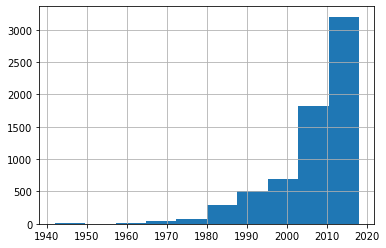

In [10]:
# pandas has a function called .hist() that works pretty well for data normalization visualization, 
# because it just ignores missing values. That means that you don't need to do a whole lot of data cleaning.

# Here's how .hist() works:


anime.aired_from_year.hist()

In [11]:
# The only downside to .hist() is that is does not provide a fitted curve.

<AxesSubplot:xlabel='aired_from_year', ylabel='Count'>

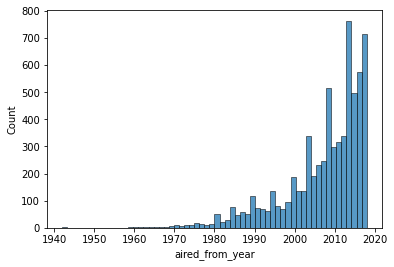

In [12]:
# If you want a fitted curve, you'll need to pull from seaborn, using the distplot() function.

sns.histplot(anime['aired_from_year'])


# Transforming negatively skewed data

In [13]:
# In order to transform negatively skewed data, you will either square or cube your data.

# Squaring the Variable

# How about trying to transform the aired_from_year variable that you looked at earlier? 
# It had a relatively large negative skew to it. So, start by squaring your data. 
# The ** means that you are raising the variable to a power of 2.

anime['aired_from_yearSQ'] = anime['aired_from_year']**2

<AxesSubplot:>

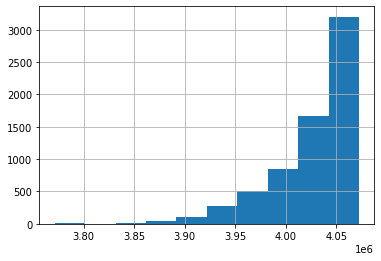

In [14]:
# Then take a look at the histogram to assess your progress:

anime.aired_from_yearSQ.hist()

In [15]:
# Cubing the Variable
# The histogram above still does not look very normal, which means that it is time to try cubing it!

anime['aired_from_yearCUBE'] = anime['aired_from_year']**3


<AxesSubplot:>

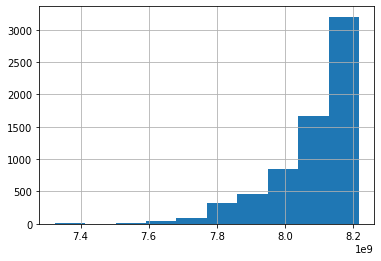

In [16]:

# Then check the histogram once more:

anime.aired_from_yearCUBE.hist()

In [17]:
# This has not made a lot of impact, but it is slightly better than the original,
# so you most likely want to use the cubed transformation.

## Transforming positively skewed data

<AxesSubplot:>

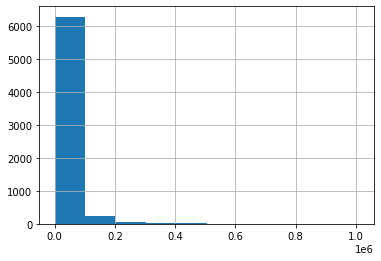

In [18]:
# Take a look at the scored_by variable:

anime.scored_by.hist()

In [19]:
# It is quite positively skewed!

# Using np.sqrt()
# So, try a square root transformation first, using the function from numpy called .sqrt():

anime['scored_bySQRT'] = np.sqrt(anime['scored_by'])


<AxesSubplot:>

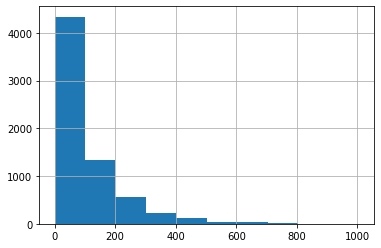

In [20]:
# Graph

anime.scored_bySQRT.hist()

In [21]:
# Looking at the above graph, that is better, but still no where close to normal.

# Using np.log()
# So, try a log transformation!

anime['scored_byLOG'] = np.log(anime['scored_by'])

/opt/homebrew/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [22]:
# Again, this .log() function comes from numpy. You may get a warning when you run it like this one:

# RuntimeWarning: divide by zero encountered in log
# This tells you that there will be infinite values!

## Dealing with infinite data

In [23]:
# If you try and run the histogram of your log transformed data when you've been given a warning
# about infinite values, you will get this error:

# ValueError: range parameter must be finite.
# But don't panic! There is a fix, and a relatively easy one at that.
# Dropping na values will also get rid of infinite values! Simply call the dropna() function on your dataset.


anime.dropna(inplace=True)


<AxesSubplot:>

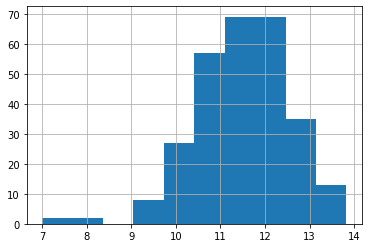

In [24]:
anime.scored_byLOG.hist()

In [25]:
# That doesn't look too shabby! Not quite normal, but you'll take it.

# BoxCox Transformation

In [26]:
# Just like the Tukey's Ladder of Power Transformations in R, you can transform by power in Python as well.
# However, the Python version, called boxcox(), has limited functionality. It does not seem to work well for 
# negatively skewed data (so check your results very carefully!), and it does not automatically transform 
# your data, unlike R. It just runs off a power system.



In [27]:
# In order to use the boxcox() function, you will need to import a few packages:

from scipy import stats
from scipy.stats import boxcox

In [28]:
# Then you can call the function into a new variable, like you have been doing:

anime['scored_byLOG1'] = boxcox(anime['scored_by'],0)

# Use the boxcox() function, and specify the variable. 
# Then the last argument is the power value that you learned about at the beginning of this lesson.
# A power of 0 is a log transformation.



<AxesSubplot:>

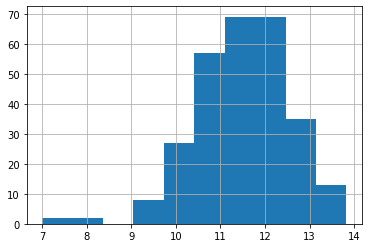

In [29]:
anime.scored_byLOG1.hist()